## Step 1: Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option("Max_Rows", 1000)
from scipy import stats

In [2]:
house = pd.read_csv("C:\\Users\\Mahesh\\Desktop\\IIT-B\\Machine Learning\\Assignment_Advanced Regression\\train.csv")

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.shape

(1460, 81)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


1. From the above it is clear that the data needs to be sclaed as each of the features are at different scale.

In [7]:
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


#### Analysing the Target Variable

Skewness: 1.882876
Kurtosis: 6.536282


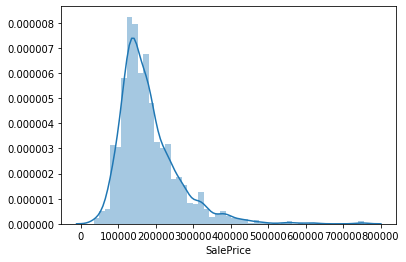

In [8]:
## Target variable: SalePrice
sns.distplot(house['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % house['SalePrice'].skew())
print("Kurtosis: %f" % house['SalePrice'].kurt())

1. As we see, the target variable SalePrice is not normally distributed.
2. This can reduce the performance of the ML regression models because some assume normal distribution.
3. Therfore we make a log transformation, the resulting distribution looks much better.

Skewness: 0.121335
Kurtosis: 0.809532


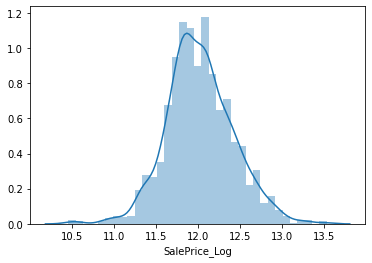

In [9]:
house['SalePrice_Log'] = np.log(house['SalePrice'])

sns.distplot(house['SalePrice_Log']);
# skewness and kurtosis
print("Skewness: %f" % house['SalePrice_Log'].skew())
print("Kurtosis: %f" % house['SalePrice_Log'].kurt())
# dropping old column
#housing.drop('SalePrice', axis= 1, inplace=True)

The distribution is much better than the skewed one.

## Step 2 : Data Cleaning and EDA

Numerical and categorical Features

In [10]:
# count of numerical and categorical features
numerical_features = house.dtypes[house.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = house.dtypes[house.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  39
Number of Categorical features:  43


In [11]:
# print all the numerical and categorical features column
print("Numerical Features")
print(house[numerical_features].columns)
print("#"*100)
print("Categorical Features")
print(house[categorical_features].columns)

Numerical Features
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'SalePrice_Log'],
      dtype='object')
####################################################################################################
Categorical Features
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior

In [12]:
# Like target variables let's check if there is any column that is Skewed
for col in numerical_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(house[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(house[col].kurt())  
         )

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.16     Kurtosis: 017.45
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.67     Kurtosis: 010.08
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

From the above it is clear that
1. MiscVal is highly Skewed.
2. GrLivArea is weakly Skewed.

#### Columns with strong correlation with SalePrice

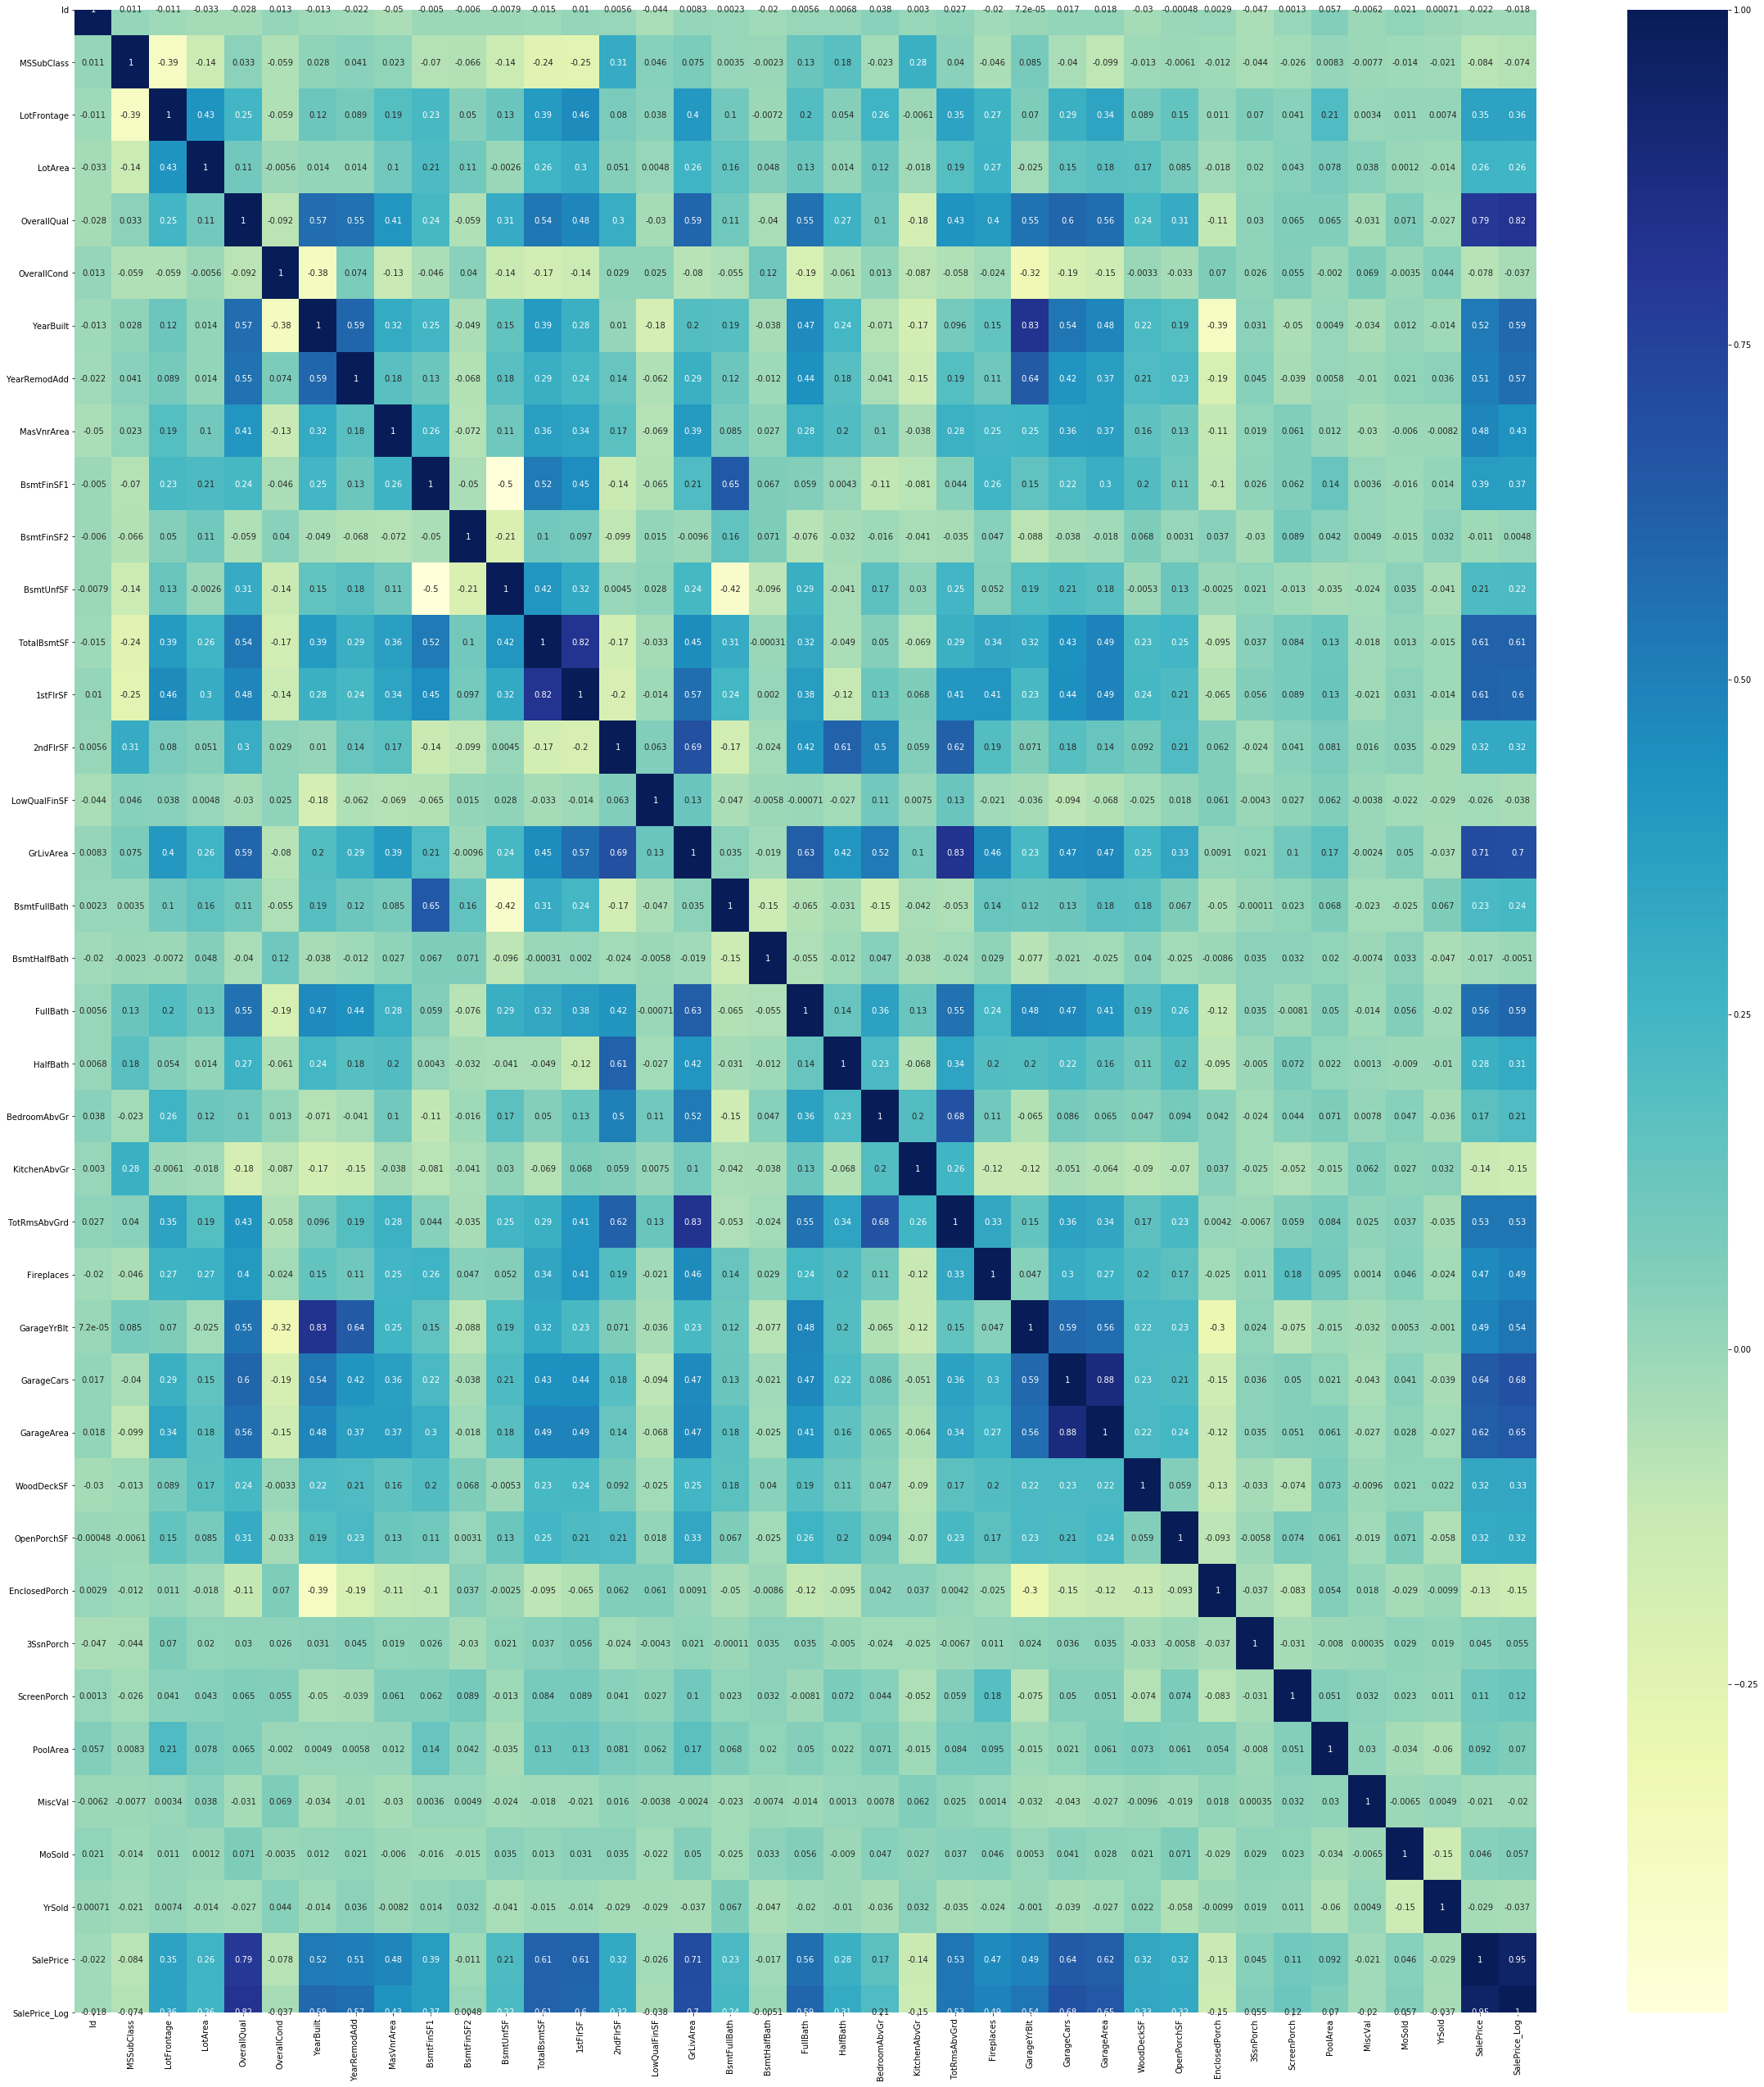

In [13]:
plt.figure(figsize=(40,45))
sns.heatmap(house.corr() , cmap = 'YlGnBu' , annot = True)

1. From the above graphs it is clear that columns with values above 0.4 are showing high positive collinearity.
2. Columns with values below 0.4 are showing high negative collinearity.
3. So for the convience and to reduce the complexity lets caonsider 0.4 as the minimum value and choose the columns.

#### Positively and Negatively Correlated Features

In [14]:
corr = house.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_features)
ser_corr = corr_abs.nlargest(nr_num_cols,'SalePrice_Log')['SalePrice_Log']

cols_abv_corr_limit = list(ser_corr[ser_corr.values > 0.4].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= 0.4].index)

In [15]:
print("Positively Correlated Features :")
print(cols_abv_corr_limit)

Positively Correlated Features :
['SalePrice_Log', 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea']


In [16]:
print("Negatively Correlated Features :")
print(cols_bel_corr_limit)

Negatively Correlated Features :
['BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'MSSubClass', 'PoolArea', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


#### Variations of Numerical Variables v/s SalePrice

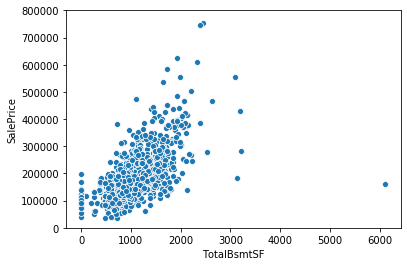

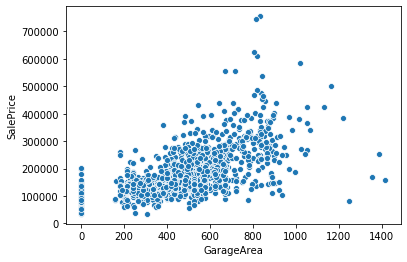

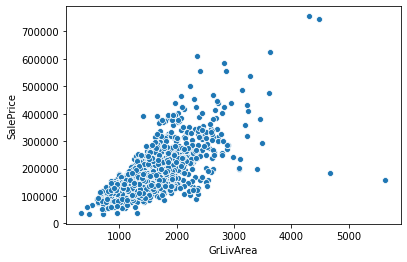

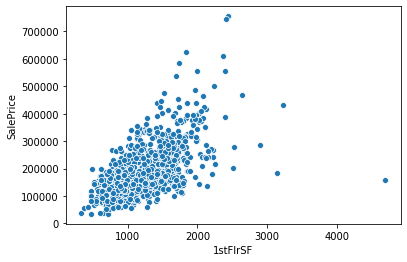

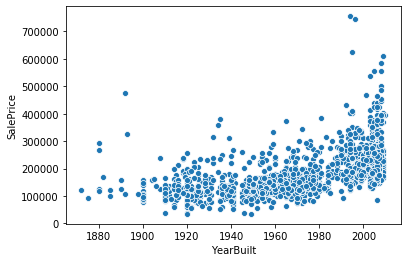

In [17]:
# Highest correlated variables 
# TotalBsmtSF
plt.figure()
plt.subplot()
sns.scatterplot(house["TotalBsmtSF"],house["SalePrice"]).axis(ymin=0, ymax=800000)


#GarageArea: Size of garage in square feet
# Well the  data is scattered every where it has some outliers and dif. has some unsual values like area = 0 
plt.figure()
plt.subplot()
sns.scatterplot(house["GarageArea"],house["SalePrice"])


# GrLivArea: Above grade (ground) living area square feet
# there some few outliers 
plt.figure()
plt.subplot()
sns.scatterplot(house["GrLivArea"],house["SalePrice"])
plt.show()

plt.figure()
plt.subplot()
sns.scatterplot(house["1stFlrSF"],house["SalePrice"])

plt.figure()
plt.subplot()
sns.scatterplot(house["YearBuilt"],house["SalePrice"])

plt.show()


1. From the barplot it is evident that there are outliers in all the numerical columns.
2. TotalBsmtSF,GarageArea,GrLivArea,1stFlrSF,YearBuilt are highly correlted variables with the SalePrice.

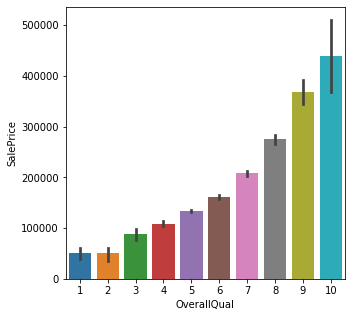

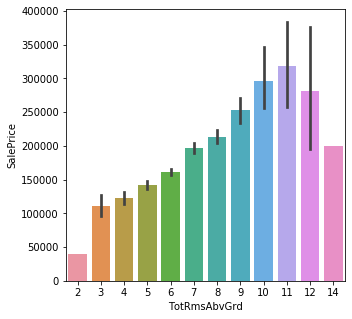

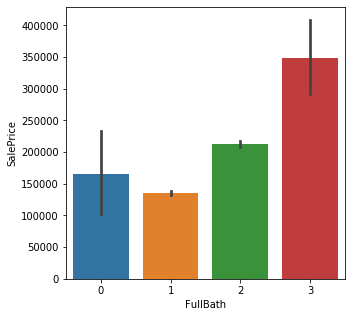

In [18]:
plt.figure(figsize=(5,5,))
sns.barplot(house["OverallQual"], house["SalePrice"])

plt.figure(figsize=(5,5,))
sns.barplot(house["TotRmsAbvGrd"], house["SalePrice"])

plt.figure(figsize=(5,5,))
sns.barplot(house["FullBath"], house["SalePrice"])


plt.show()

1. From the barplot it is evident that there are outliers in all the numerical columns.
2. Excellent houses have good price.
3. 3 bathrooms are must to have higher price.
4. 9 and 11 rooms above ground will have higher price.

#### Categorical Features and Their Unique Counts

In [19]:
for catg in list(categorical_features) :
    print(house[catg].value_counts())
    print('#'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
Grvl    50
Pave    41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
############################################

#### Variation of Categorical Variables with SalePrice

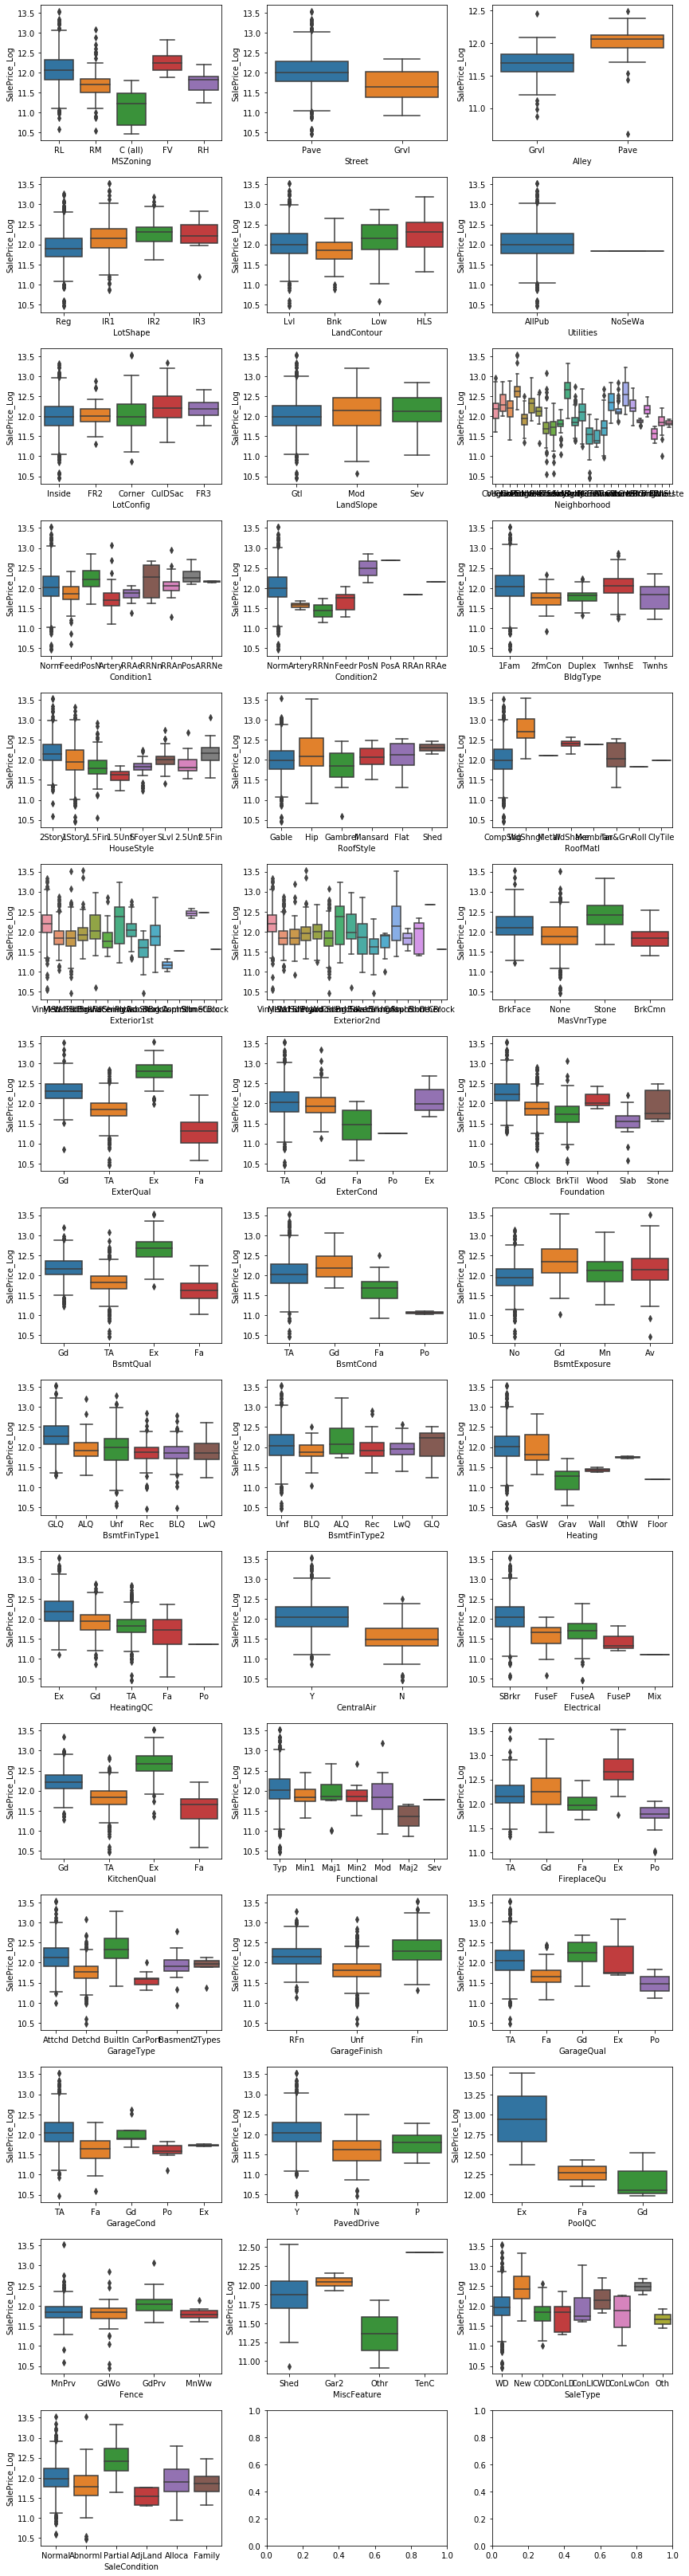

In [20]:
li_cat_feats = list(categorical_features)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y='SalePrice_Log', data=house, ax = axs[r][c])
    
plt.tight_layout()    
plt.show() 

From the above graph it is clear that
1. For many of the categorical there is no strong relation to the SalePrice.
2. However, some features has strong correlation with SalePrice .
3. 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType' has stong correlation with SalePrice.
4. 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition' has weak correlation with SalePrice.

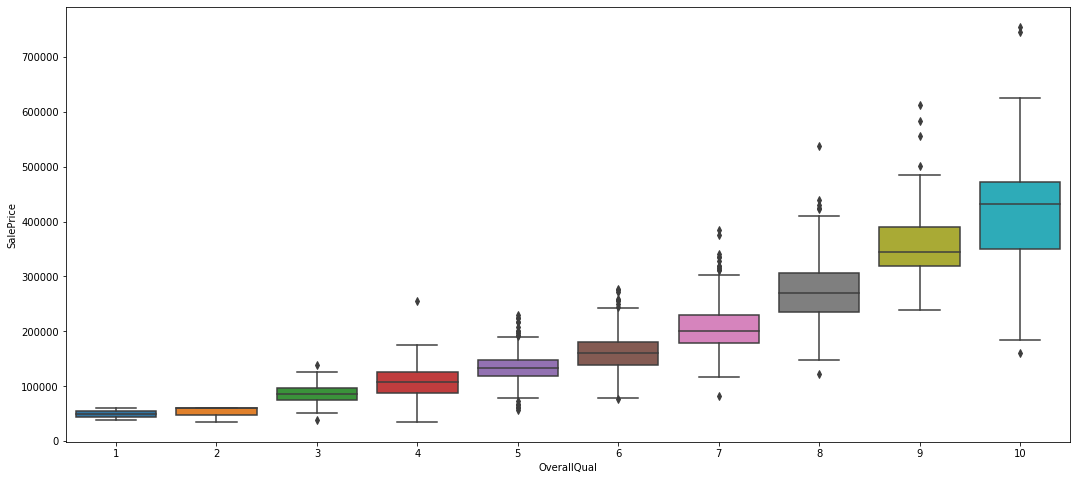

In [21]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=house.OverallQual, y=house.SalePrice)

Rates the overall material and finish of the house
1. Very Excellent houses have highest price.
2. Very poor house has lowest price.
3. Median of all the variants in house infer how the price distrubution is varied.

In [22]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Log
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,12.429216


In [23]:
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

Here, although some variables are numeric (int), we'd rather treat them as categorical since they have discrete values.

In [24]:
# dropping the columns we want to treat as categorical variables
house_numeric = house_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
house_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,SalePrice_Log
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,548,0,61,0,0,0,0,0,208500,12.247694
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,460,298,0,0,0,0,0,0,181500,12.109011
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,608,0,42,0,0,0,0,0,223500,12.317167
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,642,0,35,272,0,0,0,0,140000,11.849398
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,836,192,84,0,0,0,0,0,250000,12.429216


#### Outlier Analysis and Treatment

In [25]:
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,SalePrice_Log
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,12.024051
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,0.399452
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,10.460242
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,11.775097
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,12.001505
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,12.273731
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,12.535376
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,12.694958
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,13.000323


(1453, 82)

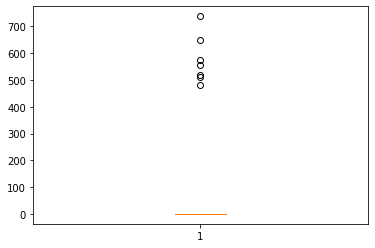

In [26]:
# outlier treatment for PoolArea
plt.boxplot(house['PoolArea'])
Q1 = house['PoolArea'].quantile(0.1)
Q3 = house['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (house['PoolArea'] <= Q3 + 1.5*IQR)]
house.shape

From the box plot it is clear that there is presence of outlier
1. IQR technique is used for Outlier Treatment.

(1402, 82)

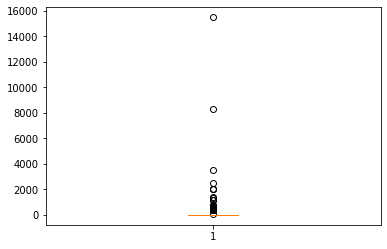

In [27]:
# outlier treatment for MiscVal
plt.boxplot(house['MiscVal'])
Q1 = house['MiscVal'].quantile(0.1)
Q3 = house['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (house['MiscVal'] <= Q3 + 1.5*IQR)]
house.shape

From the box plot it is clear that there is presence of outlier
1. IQR technique is used for Outlier Treatment.

(1291, 82)

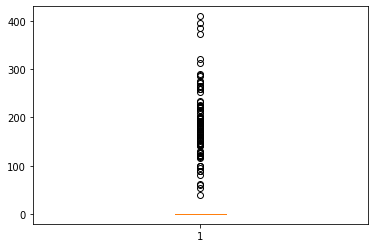

In [28]:
# outlier treatment for ScreenPorch
plt.boxplot(house['ScreenPorch'])
Q1 = house['ScreenPorch'].quantile(0.1)
Q3 = house['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (house['ScreenPorch'] <= Q3 + 1.5*IQR)]
house.shape

From the box plot it is clear that there is presence of outlier
1. IQR technique is used for Outlier Treatment.

(1274, 82)

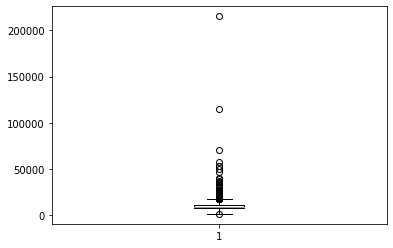

In [29]:
# outlier treatment for LotArea
plt.boxplot(house['LotArea'])
Q1 = house['LotArea'].quantile(0.1)
Q3 = house['LotArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['LotArea'] >= Q1 - 1.5*IQR) & 
                      (house['LotArea'] <= Q3 + 1.5*IQR)]
house.shape

From the box plot it is clear that there is presence of outlier
1. IQR technique is used for Outlier Treatment.

(1255, 82)

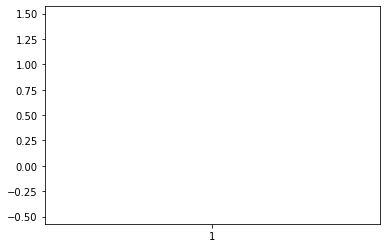

In [30]:
# outlier treatment for MasVnrArea
plt.boxplot(house['MasVnrArea'])
Q1 = house['MasVnrArea'].quantile(0.1)
Q3 = house['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (house['MasVnrArea'] <= Q3 + 1.5*IQR)]
house.shape

From the box plot it is clear that there is presence of outlier
1. IQR technique is used for Outlier Treatment.

(1253, 82)

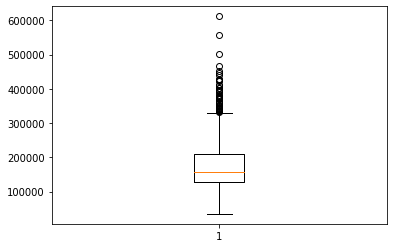

In [31]:
# outlier treatment for SalePrice
plt.boxplot(house['SalePrice'])
Q1 = house['SalePrice'].quantile(0.1)
Q3 = house['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (house['SalePrice'] <= Q3 + 1.5*IQR)]
house.shape

From the box plot it is clear that there is presence of outlier
1. IQR technique is used for Outlier Treatment.

Checking the Correlation between the variables

In [32]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,SalePrice_Log
Id,1.000000,-0.010601,-0.033226,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917,-0.017942
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799,0.355878
LotArea,-0.033226,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,0.257320
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493,0.430809
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,0.372023
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.004832
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,0.221985
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,0.612134
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852,0.596981
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334,0.319300


#### Null Value/ Missing value

In [33]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (100*(house.isnull().sum()/house.isnull().count())).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1253,100.000000
MiscFeature,1251,99.840383
Alley,1171,93.455706
Fence,1021,81.484437
FireplaceQu,632,50.438947
LotFrontage,213,16.999202
GarageQual,78,6.225060
GarageCond,78,6.225060
GarageYrBlt,78,6.225060
GarageType,78,6.225060


#### Imputing Missing Values

Null value treatment
Instead of dropping the null values which will result in a data loss, we will impute the null values according to the domain understanding and the data dictionary provided with the data.

In [34]:
#NA in Alley column means No Alley, so we will replace NA by it.
house['Alley'].fillna('No Alley', inplace=True)

In [35]:
house['MasVnrType'].fillna('None', inplace=True) 

In [36]:
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
house['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [37]:
#NA in PoolQC column means No Pool, so we will replace NA by it.
house['PoolQC'].fillna('No Pool', inplace=True) 

In [38]:
#NA in Fence column means No Fence, so we will replace NA by it.
house['Fence'].fillna('No Fence', inplace=True) 

In [39]:
house['MasVnrArea'].fillna(0, inplace=True) 

In [40]:
house['LotFrontage'].fillna(0, inplace=True) 

In [41]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

house['GarageType'].fillna('No Garage', inplace=True) 
house['GarageFinish'].fillna('No Garage', inplace=True) 
house['GarageQual'].fillna('No Garage', inplace=True) 
house['GarageCond'].fillna('No Garage', inplace=True) 

In [42]:
# MiscFeature column has almost 99% null values so we will drop it
house= house.drop('MiscFeature', axis=1)

In [43]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (100*(house.isnull().sum()/house.isnull().count())).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
GarageYrBlt,78,6.225060
BsmtFinType2,35,2.793296
BsmtExposure,35,2.793296
BsmtFinType1,34,2.713488
BsmtCond,34,2.713488
BsmtQual,34,2.713488
Electrical,1,0.079808
SalePrice_Log,0,0.000000
MasVnrType,0,0.000000
RoofStyle,0,0.000000


In [44]:
#converting year to number of years
house['YearBuilt'] = 2019 - house['YearBuilt']
house['YearRemodAdd'] = 2019 - house['YearRemodAdd']
house['GarageYrBlt'] = 2019 - house['GarageYrBlt']
house['YrSold'] = 2019 - house['YrSold']

In [45]:
#converting from int type to object to treat the variables as categorical variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

In [46]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (100*(house.isnull().sum()/house.isnull().count())).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
GarageYrBlt,78,6.225060
BsmtFinType2,35,2.793296
BsmtExposure,35,2.793296
BsmtFinType1,34,2.713488
BsmtCond,34,2.713488
BsmtQual,34,2.713488
Electrical,1,0.079808
SalePrice_Log,0,0.000000
MasVnrType,0,0.000000
RoofStyle,0,0.000000


In [47]:
house.shape

(1253, 81)

In [48]:
final = house

In [49]:
names = final.drop(["SalePrice_Log","SalePrice"],axis = 1).keys()

## Step 3: Data Preparation

Dummy Variables

In [50]:
# List of variables to map

varlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
final[varlist1] = final[varlist1].apply(binary_map)

In [51]:
# List of variables to map

varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
final[varlist2] = final[varlist2].apply(binary_map)

In [52]:
# List of variables to map

varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
final[varlist3] = final[varlist3].apply(binary_map)

## Step 4 : Splitting the Data into Test and Train

In [53]:
# split into X and y
X = final.drop(['Id'], axis=1)

In [54]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [55]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [56]:
# drop categorical variables 
X = house.drop(list(house_categorical.columns), axis=1)

In [57]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [58]:
final.shape

(1253, 81)

In [59]:
y = np.log(X.SalePrice)
X = X.drop(["SalePrice",'SalePrice_Log','Id'],1)

In [60]:
X = X.fillna(X.interpolate())

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Columns: 298 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(24), uint8(271)
memory usage: 605.7 KB


### Scaling

In [62]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.23573824, -0.26464469,  0.03998401, ..., -0.12408498,
         0.46783715, -0.30399835],
       [ 0.68651657,  0.0387642 ,  0.03998401, ..., -0.12408498,
         0.46783715, -0.30399835],
       [ 0.32589391,  0.47409   ,  0.03998401, ..., -0.12408498,
         0.46783715, -0.30399835],
       ...,
       [ 0.83677601,  0.98197011,  0.03998401, ..., -0.12408498,
         0.46783715, -0.30399835],
       [ 0.32589391,  0.06963276,  0.03998401, ..., -0.12408498,
         0.46783715, -0.30399835],
       [ 0.53625713,  0.1276762 ,  0.03998401, ..., -0.12408498,
         0.46783715, -0.30399835]])

In [63]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [64]:
print(X_train.shape)

(877, 298)


In [65]:
X_test.shape

(376, 298)

## Step 5 : Model Building And Evaluation

### Ridge Regularisation

Ridge or L2 regression is the most commonly used method of regularization for the problems which do not have a unique solution. It adds penalty equivalent to square of the magnitude of coefficients. Unlike L1 it don't srink some of the coefficients to zero. It srink the coefficients near to zero but it will never be zero.

In [66]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [67]:
#checking the value of optimum number of parameters
print("Best Parameter for Ridge Regression is :",model_cv.best_params_)
print("Best Score for Ridge Regression is :" ,model_cv.best_score_)

Best Parameter for Ridge Regression is : {'alpha': 4.0}
Best Score for Ridge Regression is : -0.07486601666254847


In [68]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014117,0.003018,0.006249,0.007653,0.0001,{'alpha': 0.0001},-0.107188,-0.119267,-0.089458,-0.085324,...,-0.095677,0.015406,27,-0.045609,-0.047606,-0.049043,-0.047131,-0.051808,-0.048239,0.002094
1,0.020496,0.005721,0.004725,0.005737,0.001,{'alpha': 0.001},-0.106615,-0.118676,-0.089327,-0.085842,...,-0.095315,0.015340,26,-0.045640,-0.047641,-0.049051,-0.047171,-0.051864,-0.048273,0.002100
2,0.018248,0.002141,0.001599,0.001958,0.01,{'alpha': 0.01},-0.102567,-0.114654,-0.088464,-0.087469,...,-0.093058,0.014527,24,-0.046079,-0.047819,-0.049113,-0.047435,-0.052285,-0.048546,0.002105
3,0.018748,0.006251,0.000000,0.000000,0.05,{'alpha': 0.05},-0.096133,-0.102315,-0.087088,-0.086956,...,-0.088350,0.011210,23,-0.047187,-0.048279,-0.049401,-0.047996,-0.053143,-0.049201,0.002095
4,0.018749,0.006248,0.000000,0.000000,0.1,{'alpha': 0.1},-0.093975,-0.094885,-0.086376,-0.085903,...,-0.085701,0.009928,21,-0.047849,-0.048878,-0.049698,-0.048435,-0.053750,-0.049722,0.002102
5,0.016586,0.001920,0.003990,0.006052,0.2,{'alpha': 0.2},-0.091691,-0.088207,-0.085433,-0.084401,...,-0.083018,0.009210,19,-0.048583,-0.049833,-0.050130,-0.049062,-0.054473,-0.050416,0.002101
6,0.016274,0.004391,0.003980,0.006054,0.3,{'alpha': 0.3},-0.090042,-0.085008,-0.084765,-0.083323,...,-0.081492,0.008903,18,-0.049062,-0.050489,-0.050451,-0.049566,-0.054925,-0.050899,0.002085
7,0.017070,0.002891,0.003125,0.006249,0.4,{'alpha': 0.4},-0.088712,-0.083073,-0.084223,-0.082589,...,-0.080417,0.008756,17,-0.049486,-0.050956,-0.050711,-0.049961,-0.055260,-0.051275,0.002060
8,0.021536,0.007118,0.003923,0.006051,0.5,{'alpha': 0.5},-0.087669,-0.081701,-0.083754,-0.082011,...,-0.079607,0.008636,16,-0.049872,-0.051316,-0.050952,-0.050305,-0.055538,-0.051596,0.002033
9,0.014929,0.001392,0.003125,0.006250,0.6,{'alpha': 0.6},-0.086804,-0.080667,-0.083339,-0.081510,...,-0.078973,0.008496,15,-0.050200,-0.051619,-0.051154,-0.050595,-0.055758,-0.051865,0.002005


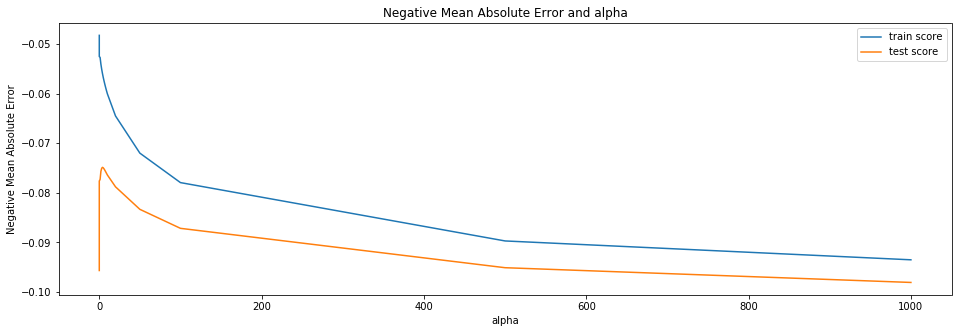

In [69]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

from the above graph and the bestparam score we got optimum lambda to be 4

In [70]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.25133069e-04,  8.65401512e-06, -2.20588487e-02,  0.00000000e+00,
       -2.83888524e-03, -1.18365688e-03,  2.25181767e-05,  6.00416351e-05,
        6.64274906e-05, -2.19274206e-05,  1.04541700e-04,  3.79571315e-02,
        7.40942391e-05,  1.14837774e-04, -3.21353121e-06,  1.85718480e-04,
        5.54378952e-04,  1.35135741e-04,  1.18243469e-04,  2.25555624e-04,
        1.18956384e-04,  2.30837991e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.17377471e-04,  2.26816826e-04, -1.18304353e-02,
        7.74590224e-03,  2.28602815e-02,  6.21192548e-03, -3.96113277e-02,
        4.86008503e-02,  2.37348477e-02, -2.13641738e-02, -1.51145142e-02,
       -1.79790545e-02,  2.19627155e-02, -6.61904575e-02, -1.71677283e-02,
        5.50421258e-03,  7.11079250e-02,  1.02537428e-02,  2.85416204e-02,
        3.77121651e-03,  2.17359114e-02,  3.66494068e-02, -1.17517976e-02,
       -4.97532204e-02,  5.19227137e-03,  1.61624950e-02, -2.91518010e-02,
        1.11370395e-02,  

In [71]:
#lets predict the R-squared value of train data
y_train_pred = ridge.predict(X_train)
print("Ridge R2 of Train Data :",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

Ridge R2 of Train Data : 0.954271304748946


In [72]:
from sklearn.metrics import mean_squared_error
print ('Ridge RMSE of Train Data is: ', mean_squared_error(y_train, y_train_pred))

Ridge RMSE of Train Data is:  0.006491156359698774


In [73]:
#lets predict the R-squared value of test and train data
y_test_pred = ridge.predict(X_test)
print("Ridge R2 of Test Data :",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Ridge R2 of Test Data : 0.8856160792892317


In [74]:
print (' Ridge RMSE of Test Data is: ', mean_squared_error(y_test, y_test_pred))

 Ridge RMSE of Test Data is:  0.019387726411841052


In [75]:
print("Number of non-zero co-efficients in Ridge Regression {}".format(np.sum(ridge.coef_!=0)))

Number of non-zero co-efficients in Ridge Regression 287


In [76]:
Ridge_coef = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(Ridge_coef != 0)) + " variables and eliminated the other " +  str(sum(Ridge_coef == 0)) + " variables")

Ridge picked 287 variables and eliminated the other 11 variables


Text(0.5, 1.0, 'Coefficients in the Ridge Model')

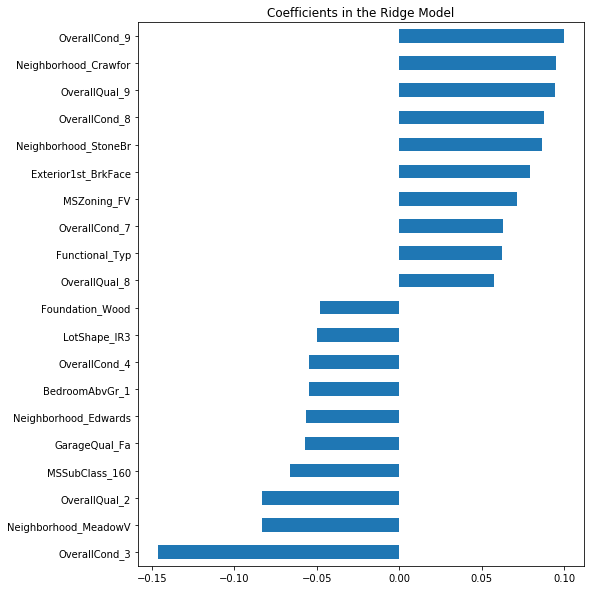

In [77]:
# plotting feature importances!
ridge_imp_coef = pd.concat([Ridge_coef.sort_values().head(10),
                     Ridge_coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
ridge_imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

Top Features of Ridge Regression are:<br>
1. Positive Coefficients<br>
Exterior1st_BrkFace<br>
OverallCond_8<br>
OverallQual_9<br>
OverallCond_9<br>
Neighborhood_Crawfor<br>
2. Negative Coefficients<br>
BedroomAbvGr_1<br>
OverallCond_4<br>
GarageQual_Fa<br>
KitchenQual_TA<br>
KitchenQual_Gd<br>      

#### Features and their co-efficient values

In [78]:
ridge_imp_coef = ridge_imp_coef.sort_values(ascending=False)
ridge_imp_coef

OverallCond_9           0.099770
Neighborhood_Crawfor    0.094683
OverallQual_9           0.094299
OverallCond_8           0.087933
Neighborhood_StoneBr    0.086268
Exterior1st_BrkFace     0.079493
MSZoning_FV             0.071108
OverallCond_7           0.062590
Functional_Typ          0.062260
OverallQual_8           0.057400
Foundation_Wood        -0.048340
LotShape_IR3           -0.049753
OverallCond_4          -0.054613
BedroomAbvGr_1         -0.054991
Neighborhood_Edwards   -0.056555
GarageQual_Fa          -0.057400
MSSubClass_160         -0.066190
OverallQual_2          -0.083100
Neighborhood_MeadowV   -0.083223
OverallCond_3          -0.146290
dtype: float64

### Lasso Regularisation

Regularization consists in adding a penalty on the different parameters of the model to reduce the freedom of the model. Hence, the model will be less likely to fit the noise of the training data and will improve the generalization abilities of the model. Lasso or L1 has the property that is able to shrink some of the coefficients to zero. It adds penalty equivalent to absolute value of the magnitude of coefficients. Therefore, that feature can be removed from the model

In [79]:
#lets find out the R-squared value of the lasso model
lasso = Lasso()
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [80]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.305839,0.120299,0.006965,6.181583e-03,0.0001,{'alpha': 0.0001},0.908424,0.898260,0.918488,0.894750,...,0.913045,0.018164,1,0.963689,0.963571,0.959508,0.963844,0.957232,0.961569,0.002711
1,0.054030,0.007109,0.000800,1.599884e-03,0.001,{'alpha': 0.001},0.915733,0.897435,0.904772,0.904769,...,0.911160,0.012439,2,0.936933,0.939963,0.936846,0.938355,0.934768,0.937373,0.001728
2,0.024794,0.003918,0.003999,9.933790e-07,0.01,{'alpha': 0.01},0.879899,0.836472,0.860732,0.833353,...,0.855986,0.018278,3,0.862228,0.870060,0.865892,0.871275,0.865286,0.866948,0.003303
3,0.074381,0.007836,0.003200,1.599765e-03,0.05,{'alpha': 0.05},0.875735,0.824052,0.852198,0.826438,...,0.847306,0.019635,5,0.850572,0.862864,0.856738,0.863348,0.856411,0.857986,0.004724
4,0.059984,0.006692,0.003227,1.614500e-03,0.1,{'alpha': 0.1},0.877887,0.823348,0.850522,0.827462,...,0.847411,0.020136,4,0.849360,0.862511,0.856137,0.862201,0.855417,0.857125,0.004878
5,0.056246,0.015934,0.006249,7.654013e-03,0.2,{'alpha': 0.2},0.880421,0.820448,0.847812,0.828123,...,0.846788,0.021382,6,0.847764,0.861421,0.854926,0.861038,0.854376,0.855905,0.005027
6,0.062496,0.035627,0.003125,6.249809e-03,0.3,{'alpha': 0.3},0.881048,0.817541,0.844628,0.828299,...,0.845483,0.022160,7,0.845479,0.860012,0.853090,0.859353,0.852842,0.854155,0.005281
7,0.062497,0.031250,0.003124,6.247520e-03,0.4,{'alpha': 0.4},0.880704,0.813965,0.840908,0.827783,...,0.843462,0.022915,8,0.843252,0.858041,0.850926,0.857219,0.850953,0.852078,0.005338
8,0.034373,0.006249,0.003125,6.249237e-03,0.5,{'alpha': 0.5},0.879874,0.809932,0.836593,0.827814,...,0.841090,0.023586,9,0.840534,0.855620,0.848171,0.855195,0.848542,0.849612,0.005530
9,0.034373,0.006250,0.000000,0.000000e+00,0.6,{'alpha': 0.6},0.878627,0.806526,0.831923,0.828052,...,0.838585,0.023996,10,0.837373,0.853351,0.845060,0.852999,0.845590,0.846875,0.005911


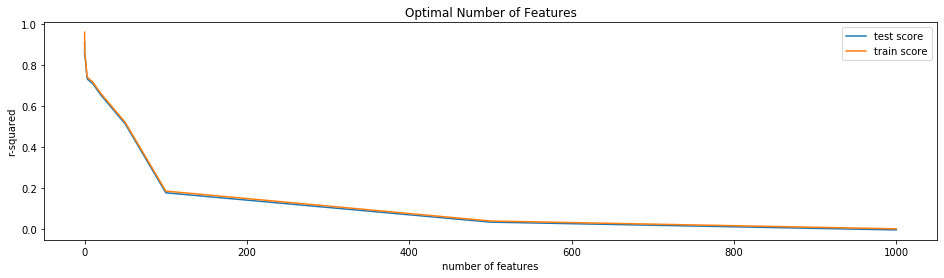

In [81]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [82]:
#checking the value of optimum number of parameters
print("Best parameter for Lasso Regression is :",model_cv1.best_params_)
print("Best Score for Lasso Regression is :",model_cv1.best_score_)

Best parameter for Lasso Regression is : {'alpha': 0.0001}
Best Score for Lasso Regression is : 0.9130450561118049


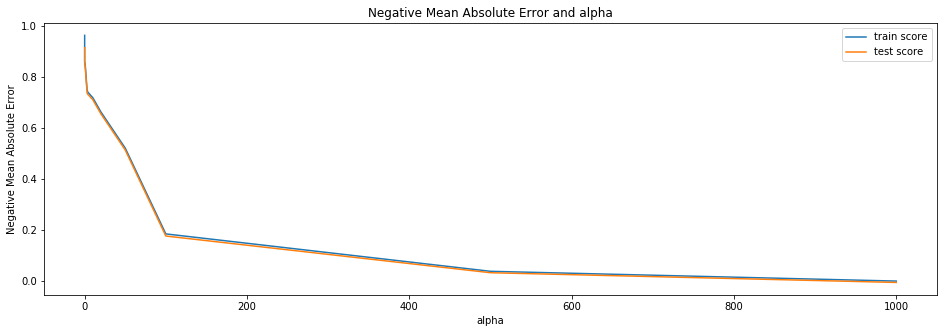

In [83]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

from the above graph and the bestparam score we got optimum lambda to be 0.0001

In [84]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print("Lasso R2 for Train Data:",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

Lasso R2 for Train Data: 0.9574508513753035


In [86]:
print("Number of non-zero co-efficientsin Lasso Regression {}".format(np.sum(lasso.coef_!=0)))

Number of non-zero co-efficientsin Lasso Regression 208


In [87]:
from sklearn.metrics import mean_squared_error
print ('Lasso RMSE for Train data is:', mean_squared_error(y_train, y_train_pred))

Lasso RMSE for Train data is: 0.0060398219362840936


In [88]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print("Lasso R2 for Test Data:",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Lasso R2 for Test Data: 0.8813809842730488


In [90]:
from sklearn.metrics import mean_squared_error
print ('Lasso RMSE for Test data is:', mean_squared_error(y_test, y_test_pred))

Lasso RMSE for Test data is: 0.020105562126788493


In [91]:
Lasso_coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(Lasso_coef != 0)) + " variables and eliminated the other " +  str(sum(Lasso_coef == 0)) + " variables")

Lasso picked 208 variables and eliminated the other 90 variables


This the reason why Lasso is used for feature selection over Ridge Regression. 

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

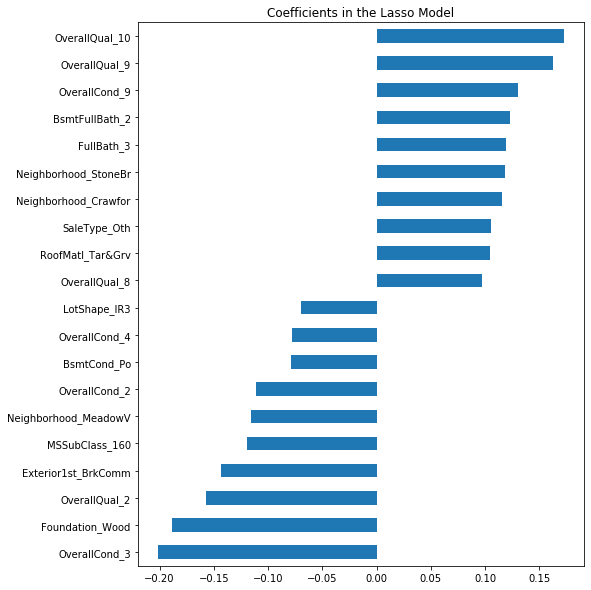

In [92]:
# plotting feature importances!
lasso_imp_coef = pd.concat([Lasso_coef.sort_values().head(10),
                     Lasso_coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
lasso_imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [93]:
lasso_imp_coef = lasso_imp_coef.sort_values(ascending=False)
lasso_imp_coef

OverallQual_10          0.172838
OverallQual_9           0.162515
OverallCond_9           0.130136
BsmtFullBath_2          0.123088
FullBath_3              0.119675
Neighborhood_StoneBr    0.118613
Neighborhood_Crawfor    0.115387
SaleType_Oth            0.105280
RoofMatl_Tar&Grv        0.104777
OverallQual_8           0.097742
LotShape_IR3           -0.070079
OverallCond_4          -0.077757
BsmtCond_Po            -0.079211
OverallCond_2          -0.110728
Neighborhood_MeadowV   -0.115455
MSSubClass_160         -0.119388
Exterior1st_BrkComm    -0.143749
OverallQual_2          -0.157473
Foundation_Wood        -0.188568
OverallCond_3          -0.201383
dtype: float64

Top Features as per Lasso Regression are:<br>
1. Positive Coefficients<br>
OverallQual_9<br>
OverallQual_10<br>
OverallCond_9<br>
Neighborhood_Crawfor<br>
Neighborhood_StoneBr<br>  
2. Negative Coefficients<br>
TotRmsAbvGrd_11<br>
BedroomAbvGr_1<br>
Exterior1st_BrkComm<br>
Foundation_Wood<br>
OverallCond_4<br>

## Step 6 : Conclusion

| Dataset | Model        | Name  | Alpha  | R-Squared | RMSE   | Score    |
|---------|--------------|-------|--------|-----------|--------|----------|
| Train   | GridSearchCV | Ridge | 4      | 95        | 0.006  | -0.0748  |
| Test    | GridSearchCV | Ridge | 4      | 89        | 0.019  | -0.0748  |
| Train   | GridSearchCV | Lasso | 0.0001 | 95        | 0.006  |  0.91304 |
| Test    | GridSearchCV | Lasso | 0.0001 | 89        | 0.020  |  0.91304 |

Out of 300 Features:
1. Ridge picked 289 variables and eliminated the other 11 variables.
2. Lasso picked 21 variables and eliminated the other 279 variables.
Clearly evident that Lasso Regression does feature selection by leving heavy penalty on the co-efficients and making the co-efficient value to 0.

1. Only Lasso Regression can be used to identify the impirtant features that determine the price of house.
2. Also here the parameters(81) are less compared to the number of samples(1460). 

Features that significantly affect the price of the house as per Ridge regression are:
1. Houses with OverallCond rates of 9 will have high prices.
2. Houses with OverallQual rates of 10 and 9 will have high prices.
3. Houses with physical location of Crawford, Stone Brook will have high prices.
4. Houses with full bathroomsin Basement will have higher prices.

#### Top Features as per Ridge Regression Along with their Co-efficient values are:

In [94]:
ridge_imp_coef = ridge_imp_coef.sort_values(ascending=False)
ridge_imp_coef

OverallCond_9           0.099770
Neighborhood_Crawfor    0.094683
OverallQual_9           0.094299
OverallCond_8           0.087933
Neighborhood_StoneBr    0.086268
Exterior1st_BrkFace     0.079493
MSZoning_FV             0.071108
OverallCond_7           0.062590
Functional_Typ          0.062260
OverallQual_8           0.057400
Foundation_Wood        -0.048340
LotShape_IR3           -0.049753
OverallCond_4          -0.054613
BedroomAbvGr_1         -0.054991
Neighborhood_Edwards   -0.056555
GarageQual_Fa          -0.057400
MSSubClass_160         -0.066190
OverallQual_2          -0.083100
Neighborhood_MeadowV   -0.083223
OverallCond_3          -0.146290
dtype: float64

#### Top Features as per Lasso Regression Along with their Co-efficient values are:

In [95]:
lasso_imp_coef = lasso_imp_coef.sort_values(ascending=False)
lasso_imp_coef

OverallQual_10          0.172838
OverallQual_9           0.162515
OverallCond_9           0.130136
BsmtFullBath_2          0.123088
FullBath_3              0.119675
Neighborhood_StoneBr    0.118613
Neighborhood_Crawfor    0.115387
SaleType_Oth            0.105280
RoofMatl_Tar&Grv        0.104777
OverallQual_8           0.097742
LotShape_IR3           -0.070079
OverallCond_4          -0.077757
BsmtCond_Po            -0.079211
OverallCond_2          -0.110728
Neighborhood_MeadowV   -0.115455
MSSubClass_160         -0.119388
Exterior1st_BrkComm    -0.143749
OverallQual_2          -0.157473
Foundation_Wood        -0.188568
OverallCond_3          -0.201383
dtype: float64

Features that significantly affect the price of the house as per Lasso regression are:
1. Houses with OverallCond rates of 8 and 9 will have high prices.
2. Houses with OverallQual rates of 9 will have high prices.
3. Houses with physical location of Crawford, Stone Brook will have high prices.
4. Houses with Exterior covering as Brick will also have high prices.

## Subjective Questions

#### After the Alpha value is doubled

In [96]:
alpha = 8
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)
ridge2.coef_

array([-1.15227391e-04,  8.72735683e-06, -1.25615942e-02,  0.00000000e+00,
       -2.74588162e-03, -1.33862178e-03,  3.18980713e-05,  6.51847912e-05,
        6.56252687e-05, -2.13379669e-05,  1.09472091e-04,  4.01601571e-02,
        7.55849032e-05,  1.19353231e-04, -8.06620990e-06,  1.86871921e-04,
        5.47530325e-04,  1.43064154e-04,  1.18355890e-04,  2.44952854e-04,
        1.30556465e-04,  2.30495916e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.47847642e-04,  1.41898330e-04, -1.72897428e-02,
        5.72470100e-03,  1.53248808e-02,  7.52227361e-03, -3.19068349e-02,
        4.76655326e-02,  1.93221882e-02, -1.34819352e-02, -8.95112517e-03,
       -1.33604084e-02,  2.06697186e-02, -5.46307653e-02, -1.35489144e-02,
        5.88999427e-03,  5.40927335e-02,  3.99841894e-03,  2.10699681e-02,
       -9.68660394e-03,  1.72865507e-02,  2.97495107e-02, -1.10024803e-02,
       -3.52700771e-02,  3.01442259e-03,  1.69656246e-02, -2.30522620e-02,
        9.45414931e-03,  

In [97]:
Ridge_coef2 = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(Ridge_coef2 != 0)) + " variables and eliminated the other " +  str(sum(Ridge_coef2 == 0)) + " variables")

Ridge picked 287 variables and eliminated the other 11 variables


Text(0.5, 1.0, 'Coefficients in the Ridge Model when Alpha is Doubled')

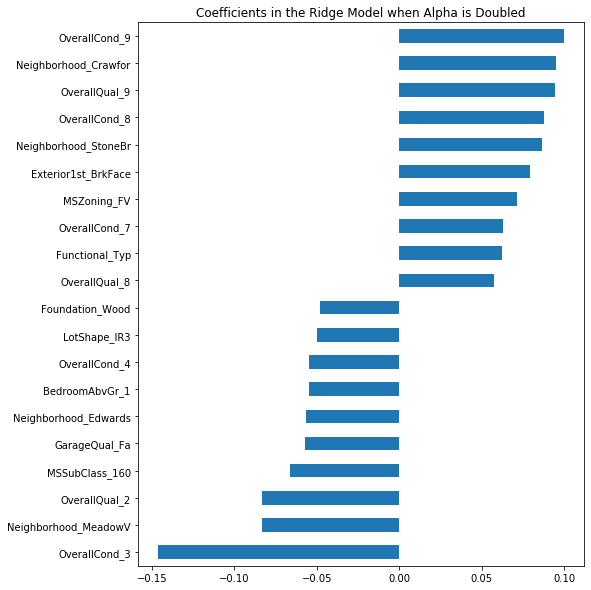

In [98]:
# plotting feature importances!
imp_coef_ridge = pd.concat([Ridge_coef2.sort_values().head(10),
                     Ridge_coef2.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_ridge.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model when Alpha is Doubled")

In [99]:
imp_coef_ridge = imp_coef_ridge.sort_values(ascending=False)
imp_coef_ridge

OverallCond_9           0.099770
Neighborhood_Crawfor    0.094683
OverallQual_9           0.094299
OverallCond_8           0.087933
Neighborhood_StoneBr    0.086268
Exterior1st_BrkFace     0.079493
MSZoning_FV             0.071108
OverallCond_7           0.062590
Functional_Typ          0.062260
OverallQual_8           0.057400
Foundation_Wood        -0.048340
LotShape_IR3           -0.049753
OverallCond_4          -0.054613
BedroomAbvGr_1         -0.054991
Neighborhood_Edwards   -0.056555
GarageQual_Fa          -0.057400
MSSubClass_160         -0.066190
OverallQual_2          -0.083100
Neighborhood_MeadowV   -0.083223
OverallCond_3          -0.146290
dtype: float64

In [100]:
alpha = 0.0002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [101]:
Lasso_coef2 = pd.Series(lasso2.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(Lasso_coef2 != 0)) + " variables and eliminated the other " +  str(sum(Lasso_coef2 == 0)) + " variables")

Lasso picked 183 variables and eliminated the other 115 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model after alpha is Doubled')

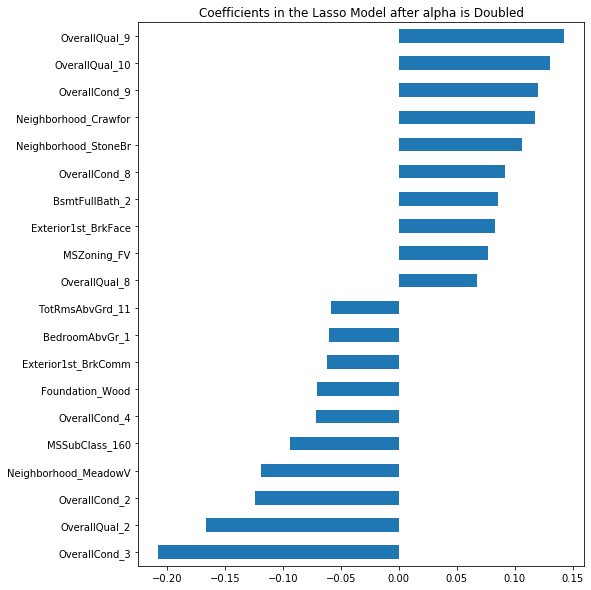

In [102]:
# plotting feature importances!
imp_coef_lasso = pd.concat([Lasso_coef2.sort_values().head(10),
                     Lasso_coef2.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_lasso.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model after alpha is Doubled")

In [103]:
imp_coef_lasso = imp_coef_lasso.sort_values(ascending=False)
imp_coef_lasso

OverallQual_9           0.142382
OverallQual_10          0.130572
OverallCond_9           0.119956
Neighborhood_Crawfor    0.117433
Neighborhood_StoneBr    0.106538
OverallCond_8           0.091984
BsmtFullBath_2          0.085677
Exterior1st_BrkFace     0.082685
MSZoning_FV             0.077128
OverallQual_8           0.067786
TotRmsAbvGrd_11        -0.058509
BedroomAbvGr_1         -0.060047
Exterior1st_BrkComm    -0.061627
Foundation_Wood        -0.070357
OverallCond_4          -0.071652
MSSubClass_160         -0.093598
Neighborhood_MeadowV   -0.118713
OverallCond_2          -0.124363
OverallQual_2          -0.166341
OverallCond_3          -0.207533
dtype: float64

#### Building the model after removing the top 5 important predictive features from the model

In [104]:
X_train2 = X_train

In [105]:
X_train.shape

(877, 298)

In [106]:
X_train2.shape

(877, 298)

In [107]:
X_train2 = X_train2.drop(['OverallQual_9','OverallQual_10','OverallCond_9','BsmtFullBath_2','FullBath_3'],1)

In [108]:
X_train2.shape

(877, 293)

In [109]:
alpha = 0.0001

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train2, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [110]:
Lasso_coef3 = pd.Series(lasso3.coef_, index = X_train2.columns)
print("Lasso picked " + str(sum(Lasso_coef3 != 0)) + " variables and eliminated the other " +  str(sum(Lasso_coef3 == 0)) + " variables")

Lasso picked 207 variables and eliminated the other 86 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model after dropping top important features')

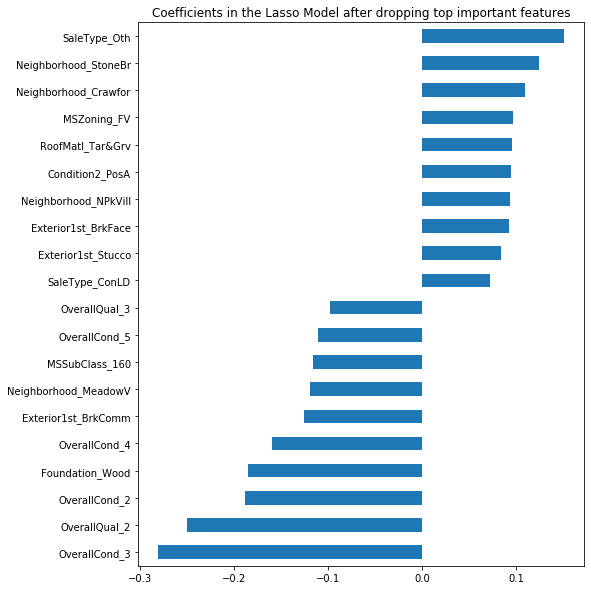

In [111]:
# plotting feature importances!
imp_coef_lasso = pd.concat([Lasso_coef3.sort_values().head(10),
                     Lasso_coef3.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_lasso.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model after dropping top important features")

In [112]:
imp_coef_lasso = imp_coef_lasso.sort_values(ascending=False)
imp_coef_lasso

SaleType_Oth            0.150756
Neighborhood_StoneBr    0.124177
Neighborhood_Crawfor    0.109347
MSZoning_FV             0.096314
RoofMatl_Tar&Grv        0.095558
Condition2_PosA         0.094823
Neighborhood_NPkVill    0.092867
Exterior1st_BrkFace     0.092689
Exterior1st_Stucco      0.083397
SaleType_ConLD          0.072493
OverallQual_3          -0.098368
OverallCond_5          -0.111117
MSSubClass_160         -0.115912
Neighborhood_MeadowV   -0.119542
Exterior1st_BrkComm    -0.125864
OverallCond_4          -0.160057
Foundation_Wood        -0.184924
OverallCond_2          -0.188783
OverallQual_2          -0.250786
OverallCond_3          -0.281107
dtype: float64

Top 5 features of Lasso Regression after removing 5 important predictors from the previous model

1)	SaleType_Oth  : Sale type with tag as others         
2)	Neighborhood_StoneBr    :  Physical location of the house is in Stone Brook.
3)	Neighborhood_Crawfor    : Physical location of the house is in Stone Brook
4)	MSZoning_FV      :  Zoning Classification is Floating Village Residential       
5)	RoofMatl_Tar&Grv : Roof material Gravel & Tar              

According to Occam’s Razor boundary the model should not be too complex or too simple. Advantages are the model will be robust (i.e. any changes in the train data the model doesn’t change significantly) and generalised (i.e. performs better on the unseen data). Both of these is achieved using Lasso Regression. This is, in fact, one of the key advantages of LASSO regression or L1-norm penalty, that it sets some of the model coefficients to exactly zero instead of just shrinking them. Effectively, this does the ‘automatic feature selection’ for you i.e. lets you automatically ignore the unimportant features even if you start with a highly complex model to fit the data. 
This is clearly visible in the House Price Case Study, Initially as per the optimum value of alpha the Lasso regression identifies few features as important predictors , but when we remove those features and again run the Lasso Regression for the model , the model again selects another few features as the important predictors. There by making the model generalised and robust.